#  📊📈🗂️🗃️ EDA - Exploratory data analysis - for 'General Data' sheet 🗃️🗂️📈📊

---


In this section, we will explore and visualize the data from our rehospitalization excel file. We will present all the visualizations and correlations between the parameters.
the analysis will be separated into two groups: numeric values, and character values.

# Basic Overview:
Dimensions of the data: Get the number of rows and columns.

Summary statistics: Check the summary statistics for numerical columns.

Check for missing values: Identify how many and which columns have missing values.

In [86]:
import pandas as pd

file_path = '/content/rehospitalization.xlsx'

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Create a dataframe for a specific sheet
sheet_name = 'GeneralData'
df_general_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Basic overview
print(df_general_data.shape, '\n')  # Rows and columns
print(df_general_data.info(), '\n')  # Data types and non-null counts
print(df_general_data.describe(), '\n')  # Summary statistics for numerical data
print(df_general_data.isnull().sum())  # Missing values by column


(4535, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        4535 non-null   int64  
 1   age            4535 non-null   int64  
 2   Gender         4535 non-null   object 
 3   גורם משלם      4524 non-null   object 
 4   משקל           3718 non-null   float64
 5   גובה           3698 non-null   float64
 6   BMI            3504 non-null   float64
 7   מחלות כרוניות  4535 non-null   int64  
 8   השכלה          2641 non-null   object 
 9   מספר ילדים     4373 non-null   object 
 10  מצב משפחתי     4474 non-null   object 
 11  תרופות קבועות  4495 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 425.3+ KB
None 

            Patient          age         משקל         גובה            BMI  \
count  4.535000e+03  4535.000000  3718.000000  3698.000000    3504.000000   
mean   3.606354e+05    80.147078    75.

# Column Types and Unique Values:
For numerical columns, identify the range of values.

In [87]:
# Checking for numerical columns
categorical_cols = df_general_data.select_dtypes(include=['object', 'category']).columns

numerical_cols = df_general_data.select_dtypes(include=['int64', 'float64']).columns
print(df_general_data[numerical_cols].describe())

            Patient          age         משקל         גובה            BMI  \
count  4.535000e+03  4535.000000  3718.000000  3698.000000    3504.000000   
mean   3.606354e+05    80.147078    75.901668   165.239313    1229.321946   
std    3.253993e+05     8.640097   147.942371    29.634842   29376.471228   
min    3.100000e+01    65.000000    30.000000     1.580000       3.200000   
25%    8.799650e+04    73.000000    61.850000   160.000000      23.400000   
50%    2.415230e+05    80.000000    72.000000   165.000000      26.300000   
75%    6.022900e+05    87.000000    83.000000   170.000000      30.000000   
max    1.171452e+06   111.000000  9036.800000  1765.000000  830000.000000   

       מחלות כרוניות  
count    4535.000000  
mean        0.137155  
std         0.344049  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


# Outlier Detection
Detect outliers using the interquartile range (IQR) method.

In [88]:
# Outlier detection with IQR
for col in numerical_cols:
    Q1 = df_general_data[col].quantile(0.25)
    Q3 = df_general_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_general_data[(df_general_data[col] < lower_bound) | (df_general_data[col] > upper_bound)]
    print(f"{col}: Number of outliers = {outliers.shape[0]}")


Patient: Number of outliers = 0
age: Number of outliers = 1
משקל: Number of outliers = 77
גובה: Number of outliers = 87
BMI: Number of outliers = 111
מחלות כרוניות: Number of outliers = 622


Since the numbers of outliers are small comparing to the dataframe we will ignore them, to better understand the true behavior of the data.

Next, Clean the outliers form the data for vizualiztion first

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns except 'מחלות כרוניות'
numerical_cols = df_general_data.select_dtypes(include=['int64', 'float64', 'float']).columns.drop('מחלות כרוניות')

# Apply the IQR filter to each of these numerical columns without affecting 'מחלות כרוניות'
for col in numerical_cols:
    Q1 = df_general_data[col].quantile(0.25)
    Q3 = df_general_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers only within the specific column
    df_general_data = df_general_data[(df_general_data[col] >= lower_bound) & (df_general_data[col] <= upper_bound)]


##Histograms for Numerical Columns:
Histograms help in understanding the distribution of numerical data.

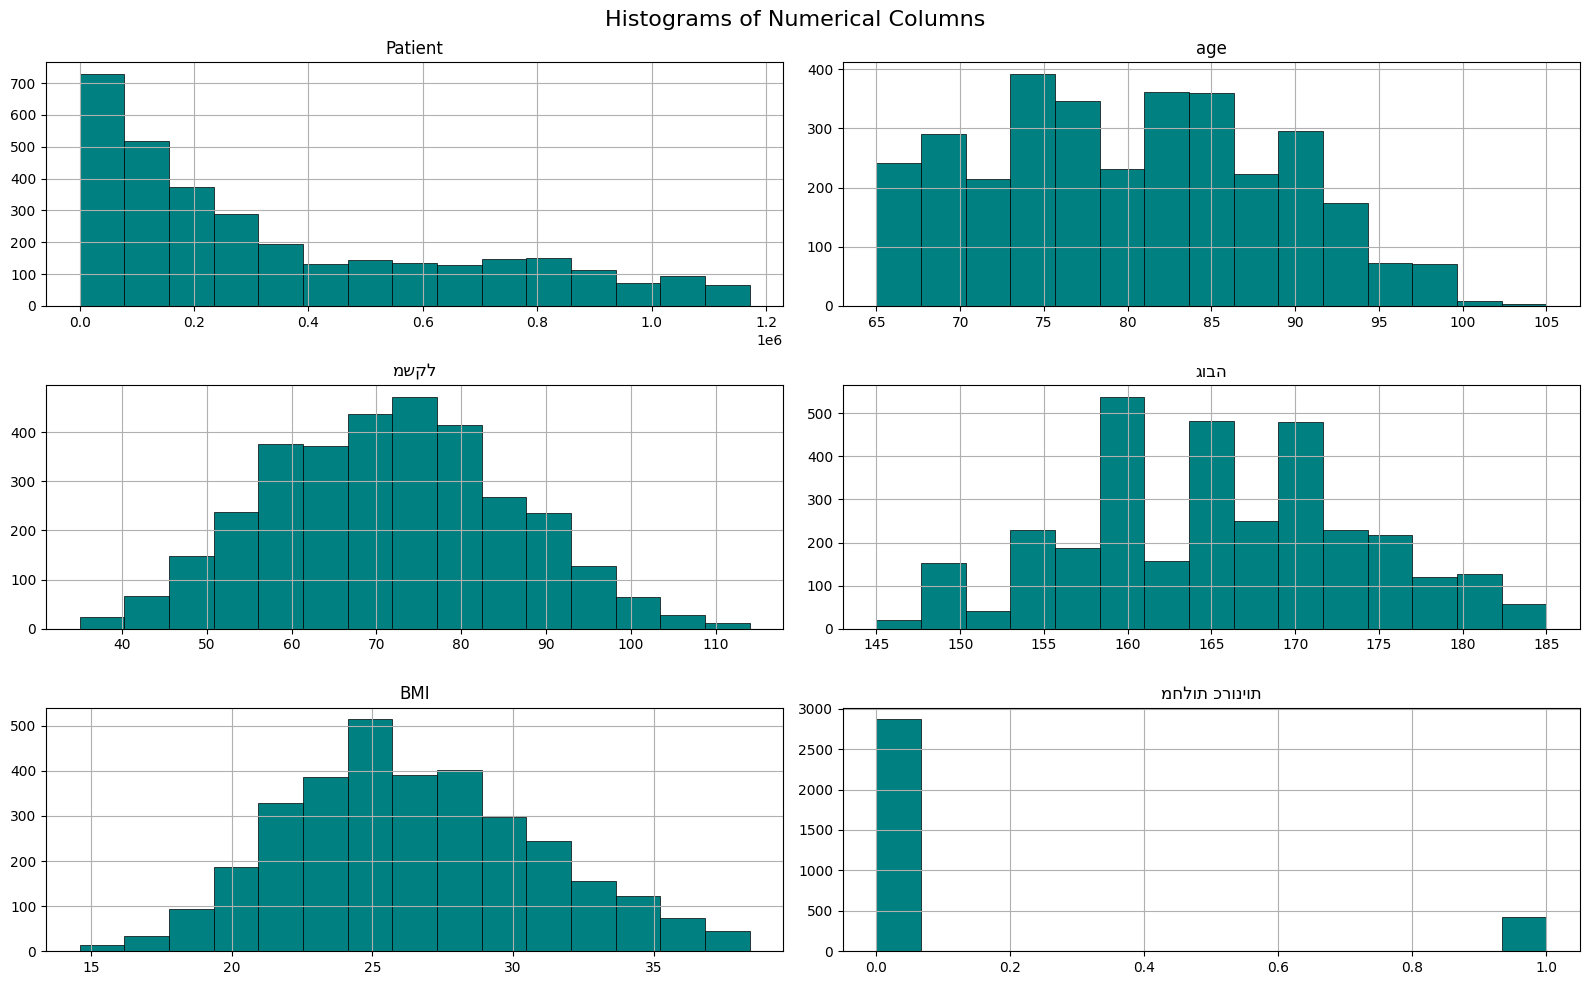

In [90]:
# Setting a color palette
sns.set_palette('Set2')

# Plotting histograms for numerical data
numerical_cols = df_general_data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df_general_data[numerical_cols].hist(bins=15, color='teal', edgecolor='black', linewidth=0.5, figsize=(16, 10))
plt.suptitle('Histograms of Numerical Columns', size=16)
plt.tight_layout()
plt.show()


In [91]:
# Now, count and plot 'מחלות כרוניות' as it retains more data
chronic_counts = df_general_data['מחלות כרוניות'].value_counts()
chronic_counts

,count
מחלות כרוניות,
0,2868
1,419


#Boxplots for Outlier Detection:
Boxplots are great for spotting outliers.

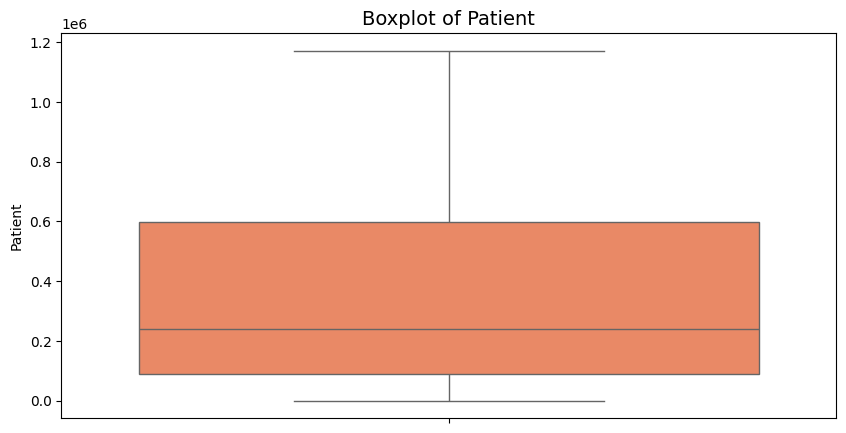

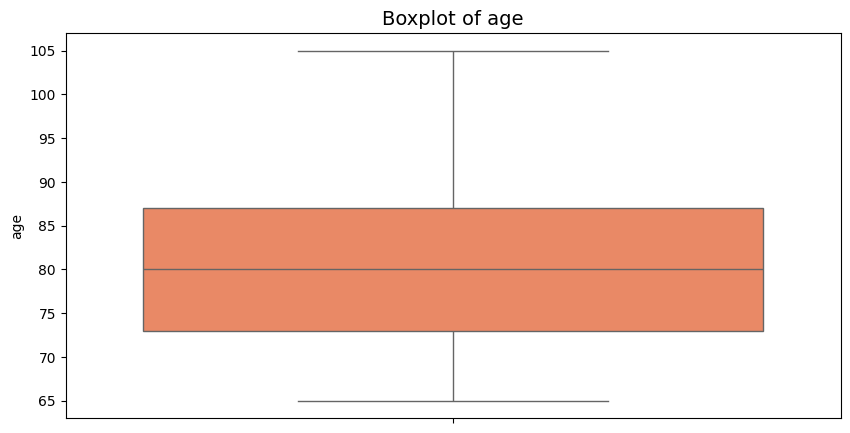

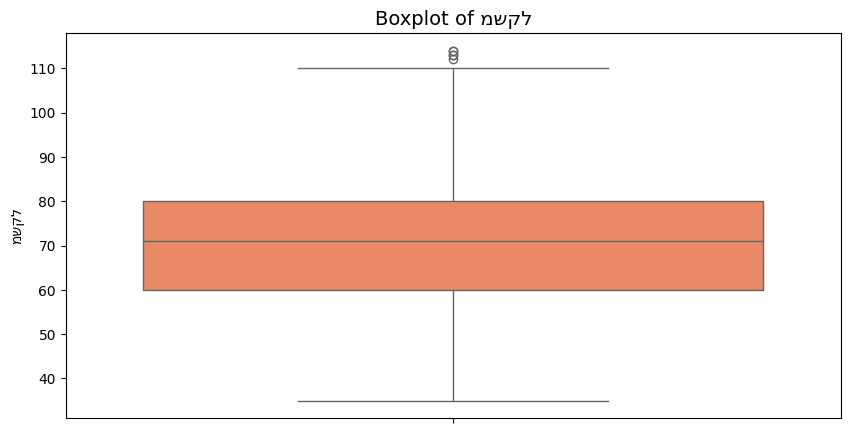

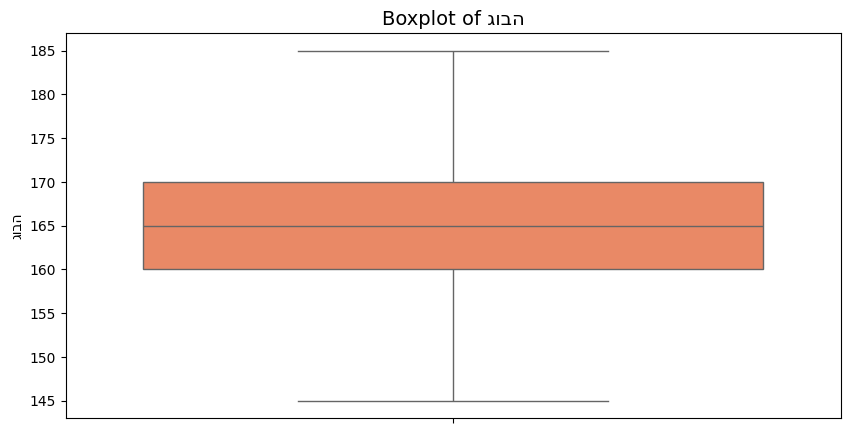

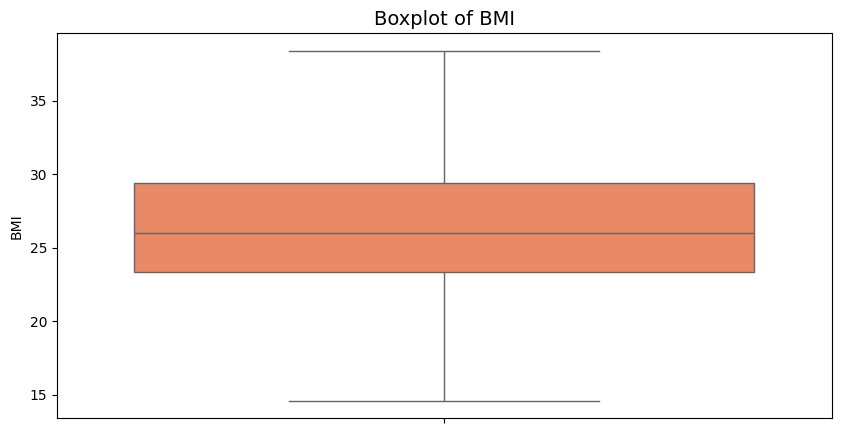

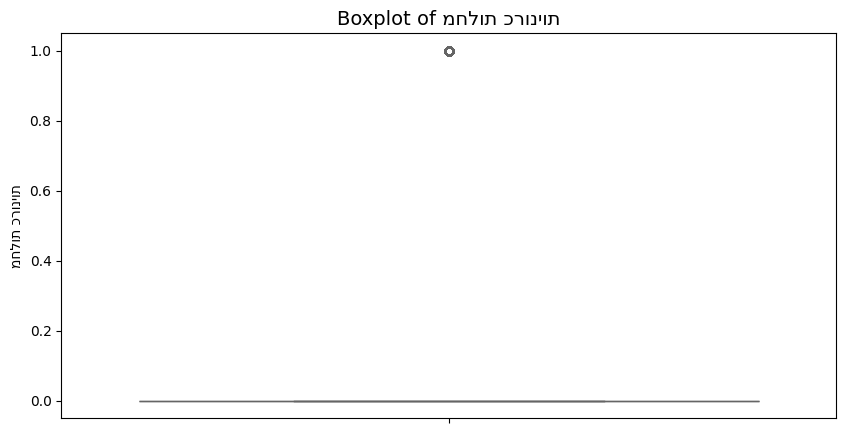

In [92]:
# Plotting boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_general_data[col], color='coral')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.show()


# Bar Charts for Categorical Data:
For categorical columns, bar charts can showcase the distribution.

<ipython-input-93-bc6f442950ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_general_data[col], palette='coolwarm', edgecolor='black')


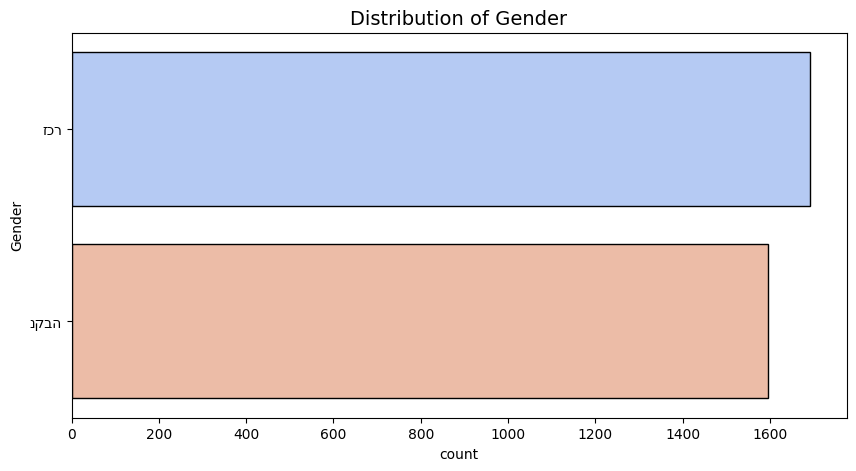

<ipython-input-93-bc6f442950ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_general_data[col], palette='coolwarm', edgecolor='black')


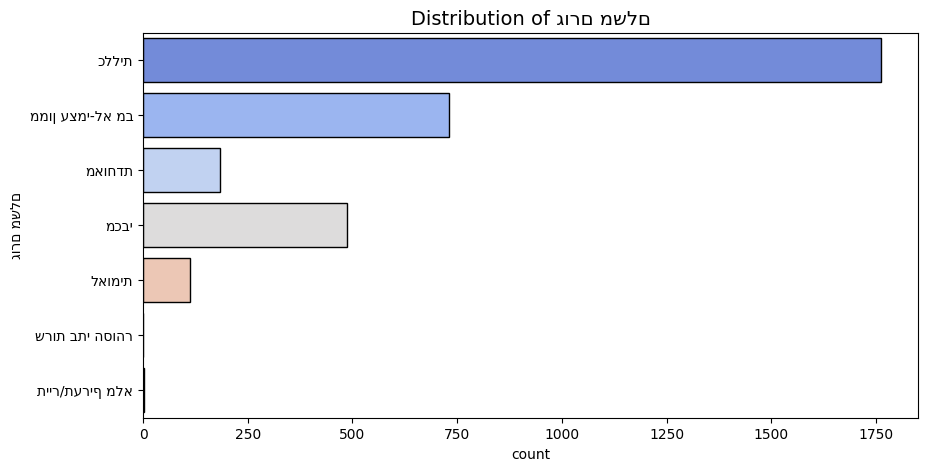

<ipython-input-93-bc6f442950ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_general_data[col], palette='coolwarm', edgecolor='black')


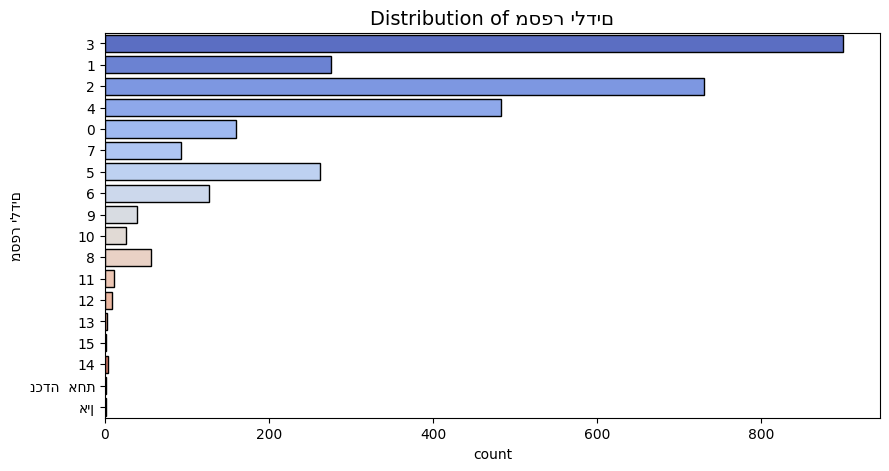

<ipython-input-93-bc6f442950ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_general_data[col], palette='coolwarm', edgecolor='black')


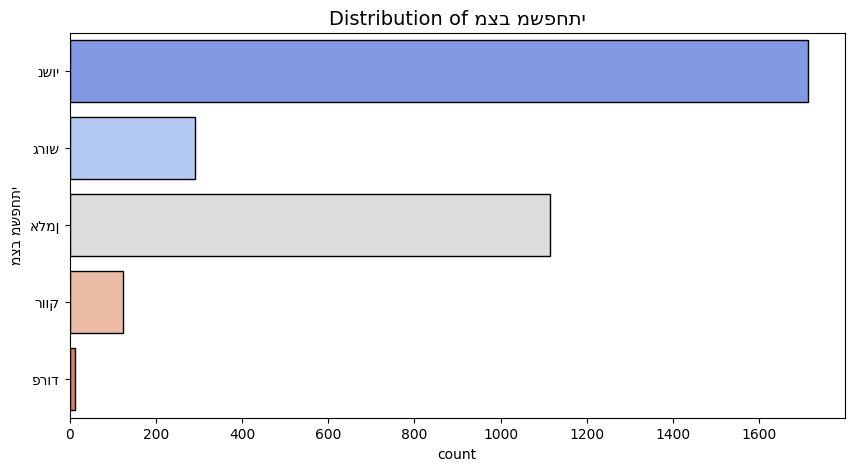

In [93]:
# Bar charts for categorical columns
categorical_cols = df_general_data.select_dtypes(include=['object', 'category']).columns

# Plotting bar charts for categorical columns
for col in categorical_cols:
    if col not in ['השכלה', 'תרופות קבועות']:
      plt.figure(figsize=(10, 5))
      sns.countplot(y=df_general_data[col], palette='coolwarm', edgecolor='black')
      plt.title(f'Distribution of {col}', fontsize=14)
      plt.show()


# KDE Plot for Distribution of Numerical Columns
KDE (Kernel Density Estimate) is a smooth line plot for visualizing data distribution.



<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


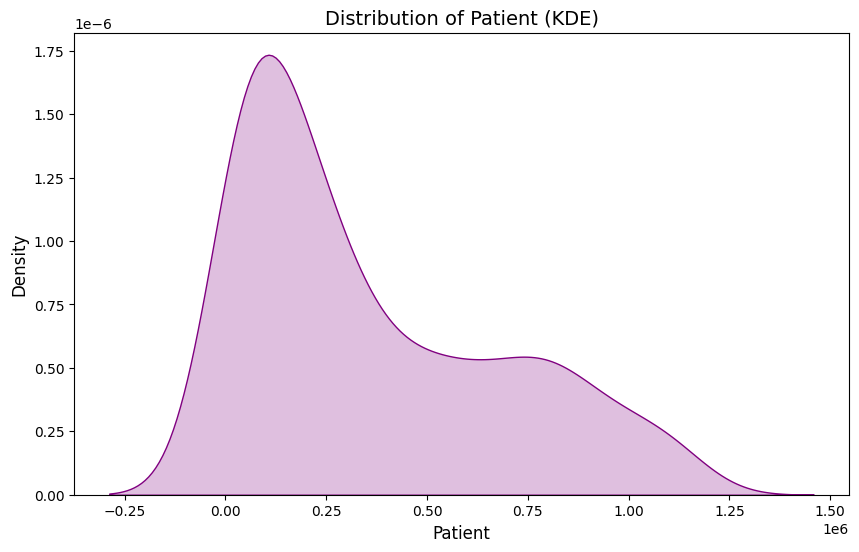

<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


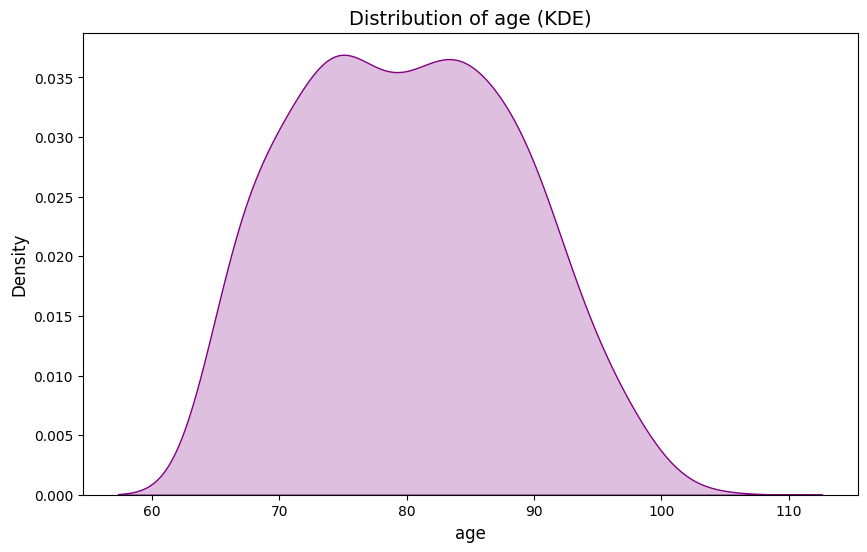

<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


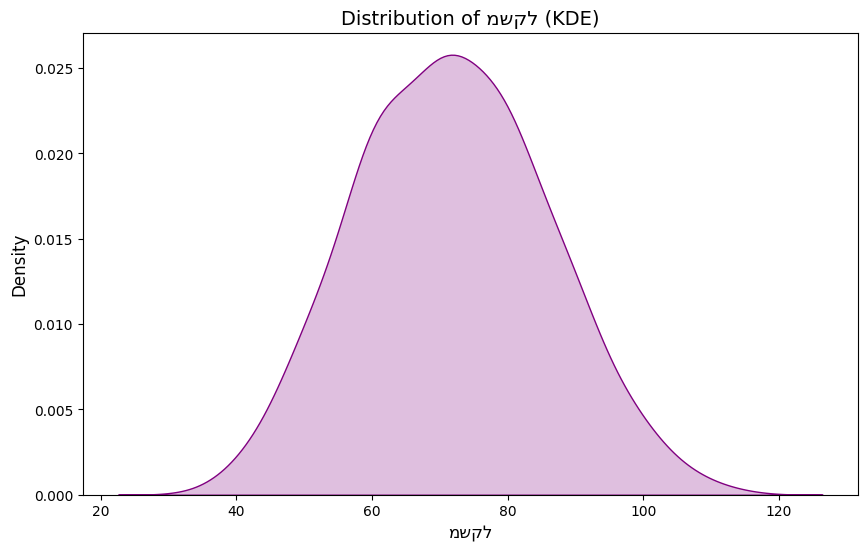

<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


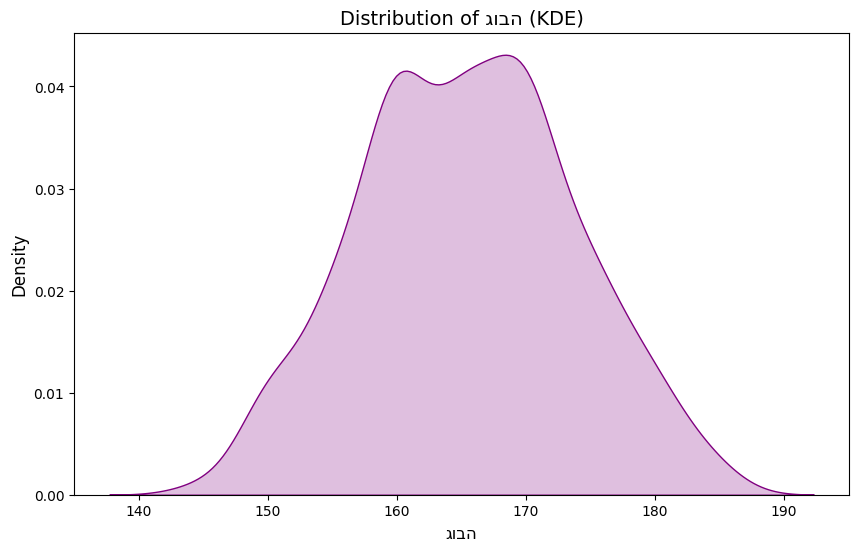

<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


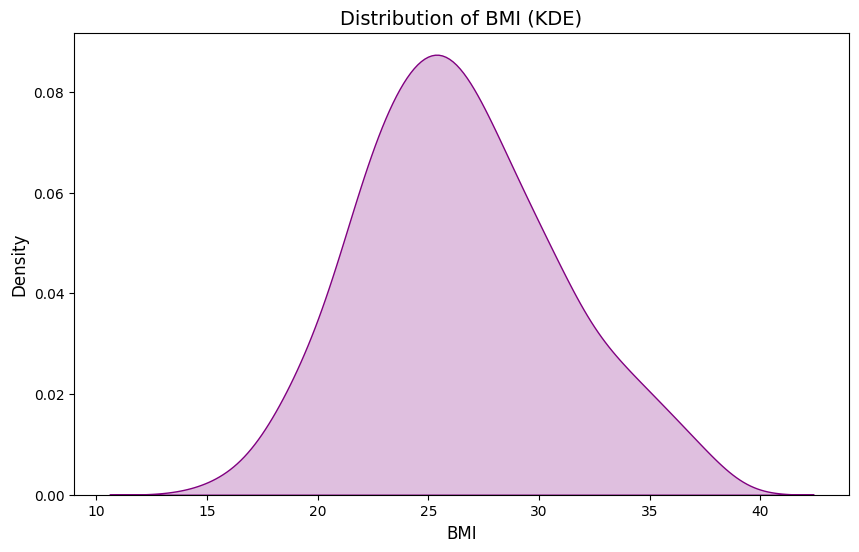

<ipython-input-94-0db55dec01fc>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)


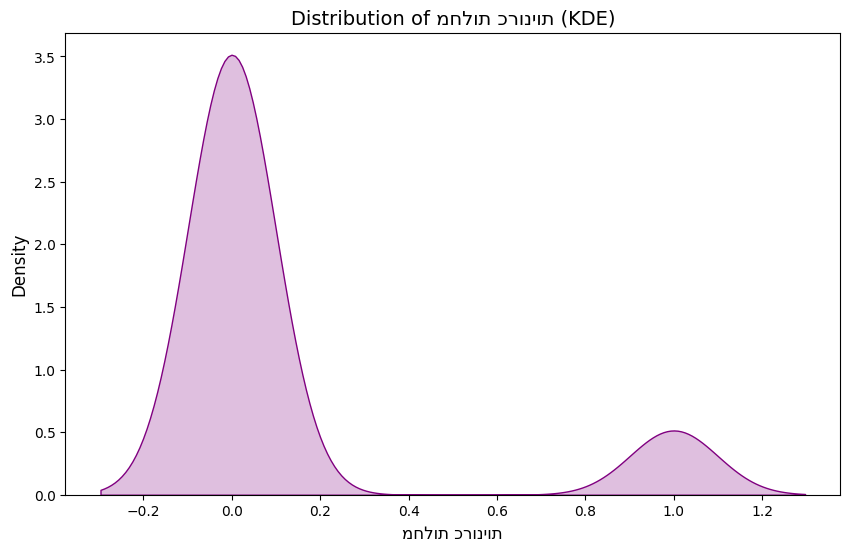

In [94]:
# KDE Plot for numerical data
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_general_data[col], color='purple', shade=True, bw_adjust=1.5)
    plt.title(f'Distribution of {col} (KDE)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

# Pair Plot for Numerical Data
A pair plot helps in visualizing relationships between multiple numerical columns.


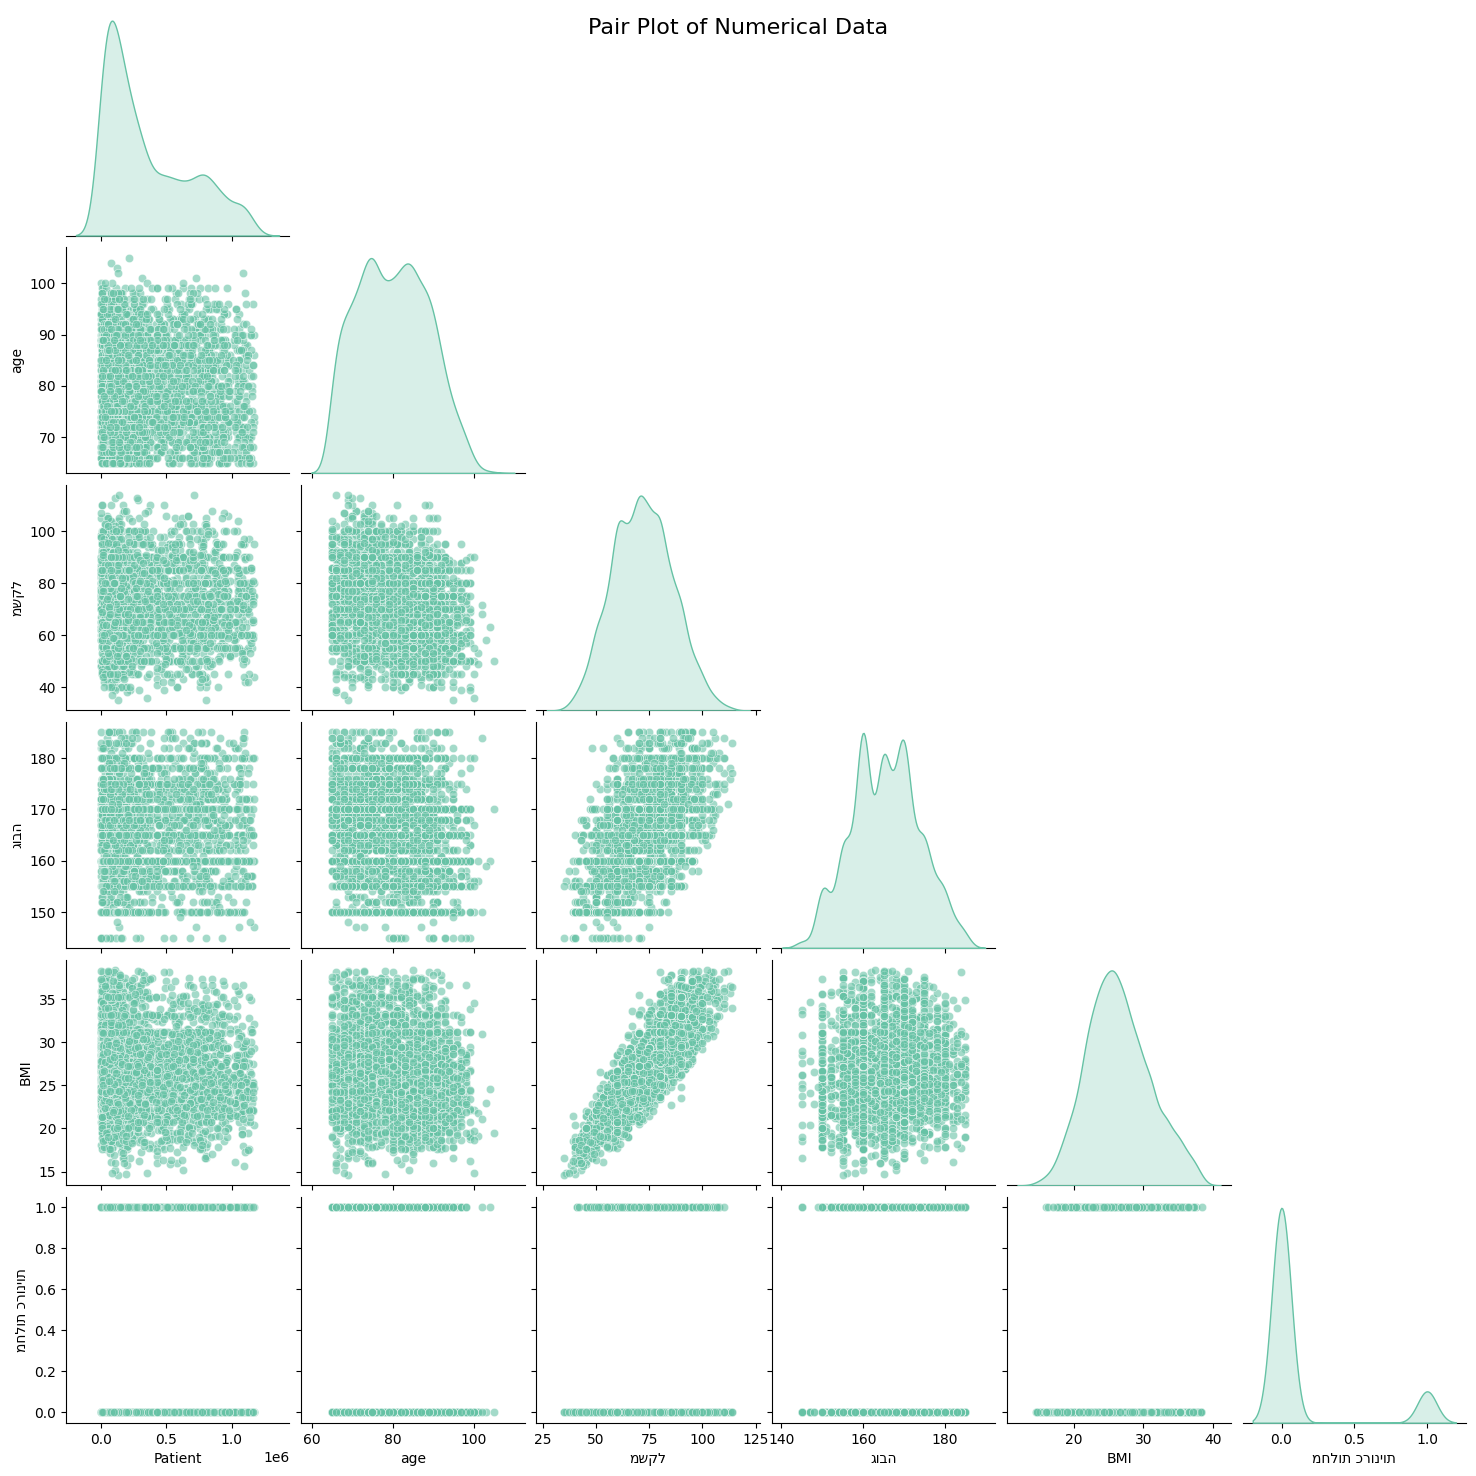

In [95]:
# Pair plot to check relationships between numerical variables
sns.pairplot(df_general_data[numerical_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Data', size=16)
plt.show()

Note:
Here we can see a high correlation between 'משקל' to 'BMI' which is a formulation of it, obviously

# Correlation Heatmap for Numerical Columns:
Heatmaps can show the correlation between numerical columns

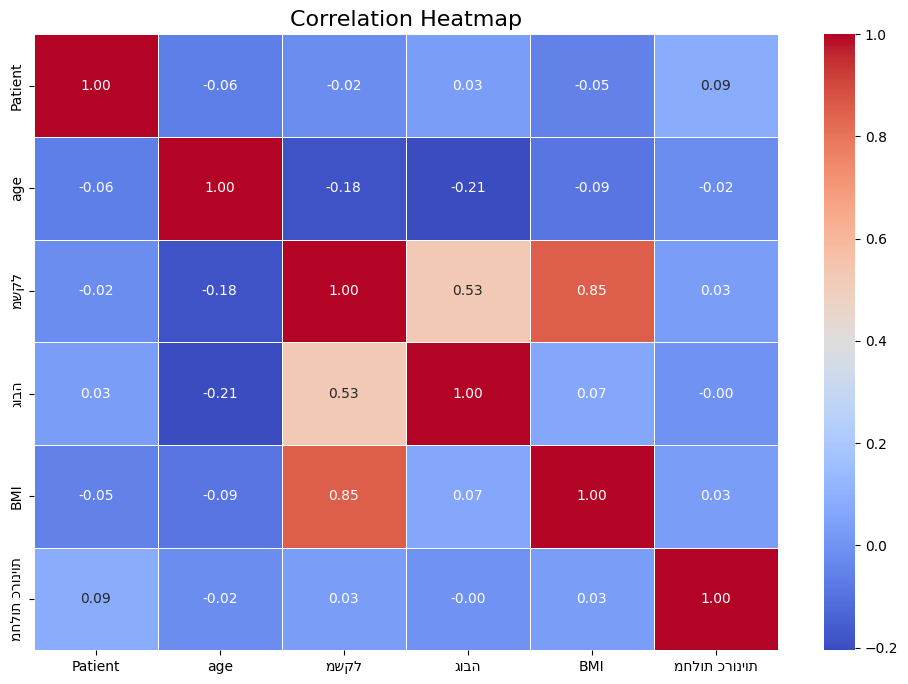

In [96]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_general_data[numerical_cols].corr()

# Drawing heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Violin Plot for Numerical vs Categorical Columns:
Violin plots combine box plots and KDE, visualization for comparing distributions across categories.

<ipython-input-97-a10ebb14e1f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_general_data[col], y=df_general_data[numerical_cols[0]], palette="viridis")


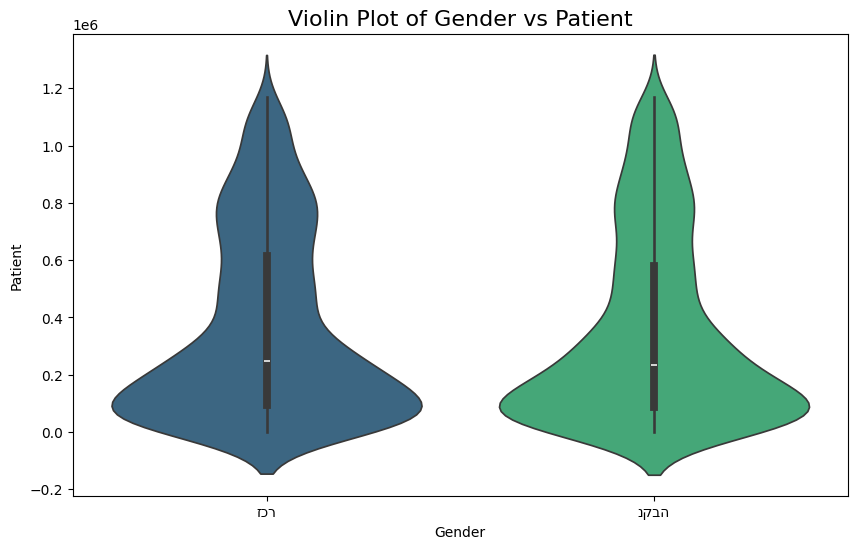

<ipython-input-97-a10ebb14e1f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_general_data[col], y=df_general_data[numerical_cols[0]], palette="viridis")


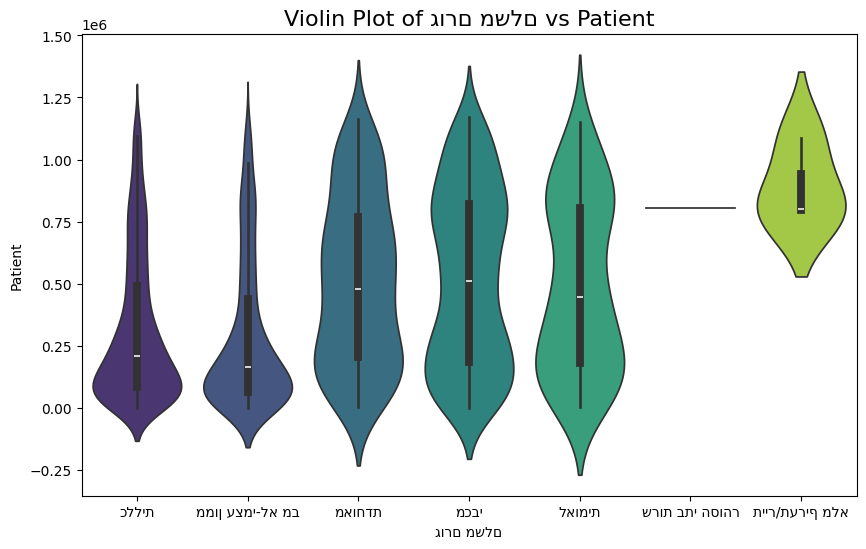

<ipython-input-97-a10ebb14e1f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_general_data[col], y=df_general_data[numerical_cols[0]], palette="viridis")


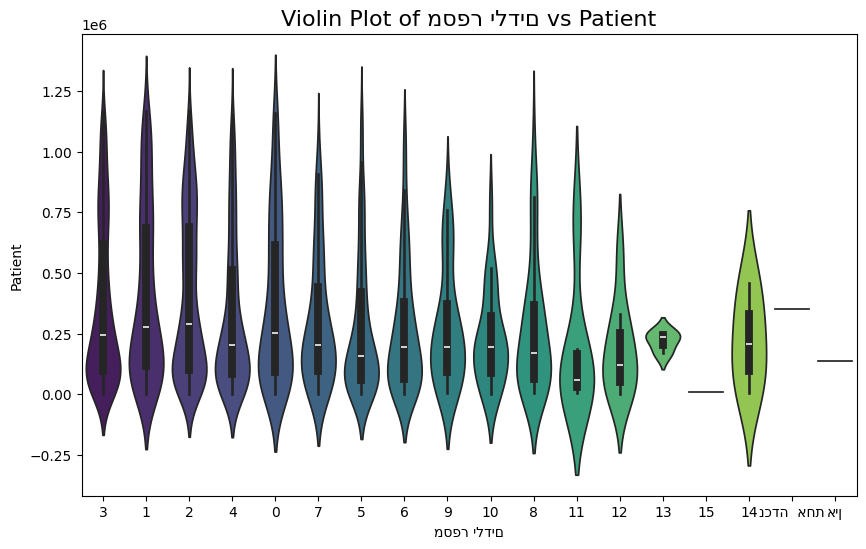

<ipython-input-97-a10ebb14e1f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_general_data[col], y=df_general_data[numerical_cols[0]], palette="viridis")


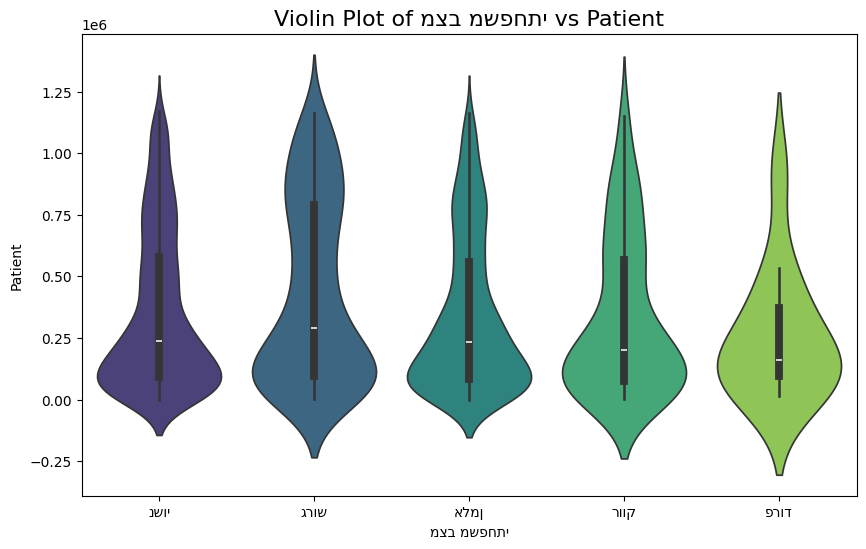

In [97]:
# Violin plot for numerical vs categorical
for col in categorical_cols:
  if col not in ['השכלה', 'תרופות קבועות']:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df_general_data[col], y=df_general_data[numerical_cols[0]], palette="viridis")
    plt.title(f'Violin Plot of {col} vs {numerical_cols[0]}', fontsize=16)
    plt.show()

This is the chapter of EDA - Exploratory data analysis, for General Data sheet.